This is the beggining of the project: spam detecter and text summarizer. In this project we will make a spam classifier which will also summarize the given message. 

In [10]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [12]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3433,ham,Sending you greetings of joy and happiness. Do...,NaN,NaN,NaN
881,ham,"see, i knew giving you a break a few times wou...",NaN,NaN,NaN
2084,ham,How are you. Wish you a great semester,NaN,NaN,NaN
3393,ham,Bull. Your plan was to go floating off to IKEA...,NaN,NaN,NaN
5187,ham,WHAT TIME U WRKIN?,NaN,NaN,NaN


## step 1 : data cleaning

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [15]:
df.sample(2)

,v1,v2
4696,ham,"Okey dokey, iÛ÷ll be over in a bit just sorti..."
2454,ham,Left dessert. U wan me 2 go suntec look 4 u?


In [16]:
df.rename(columns = {'v1':'target','v2':'text'},inplace=True)

In [17]:
df.sample(2)

,target,text
3442,ham,Your board is working fine. The issue of overh...
1144,ham,Really... I tot ur paper ended long ago... But...


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [19]:
df['target'] = encoder.fit_transform(df['target'])

label encoder will assign numeric values to text. spam is 1 and ham is assigned 0

In [20]:
df.head() 

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [22]:
df.duplicated().sum()

403

In [23]:
df = df.drop_duplicates(keep='first')

In [24]:
df.duplicated().sum()

0

In [25]:
df.shape

(5169, 2)

## EDA (exploratory data analysis)

In [26]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

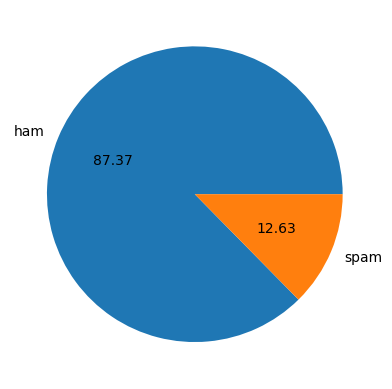

In [27]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [28]:
import nltk

In [29]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [30]:
df['char_count'] = df['text'].apply(len)

In [31]:
df['word_count'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
df['sentence_count'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,target,text,char_count,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['char_count', 'word_count', 'sentence_count']].describe()


,char_count,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [35]:
#ham
df[df['target'] == 0][['char_count', 'word_count', 'sentence_count']].describe()

,char_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [36]:
#spam
df[df['target'] == 1][['char_count', 'word_count', 'sentence_count']].describe()

,char_count,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [37]:
import seaborn as sns

<AxesSubplot:xlabel='char_count', ylabel='Count'>

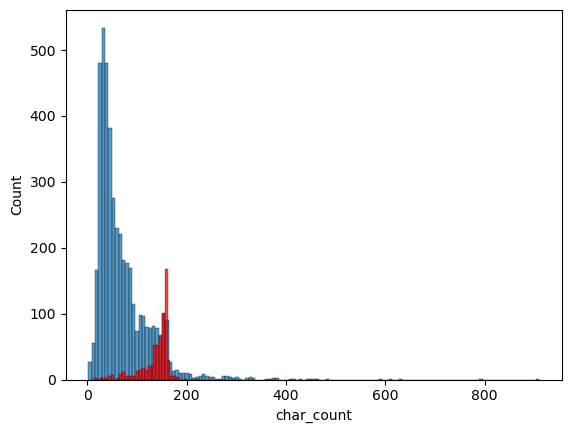

In [38]:
sns.histplot(df[df['target'] == 0]['char_count'])
sns.histplot(df[df['target'] == 1]['char_count'],color='red')

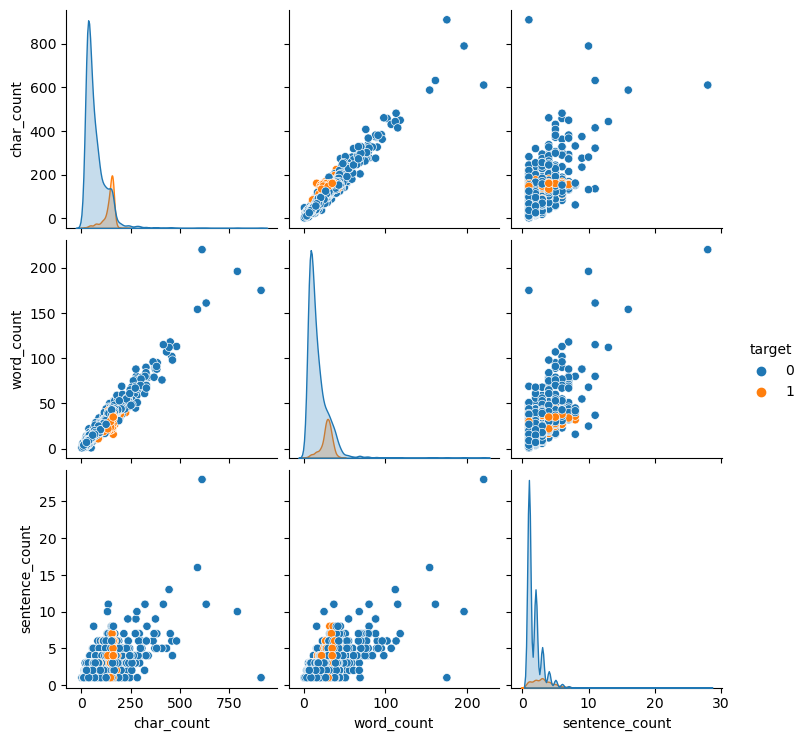

In [39]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

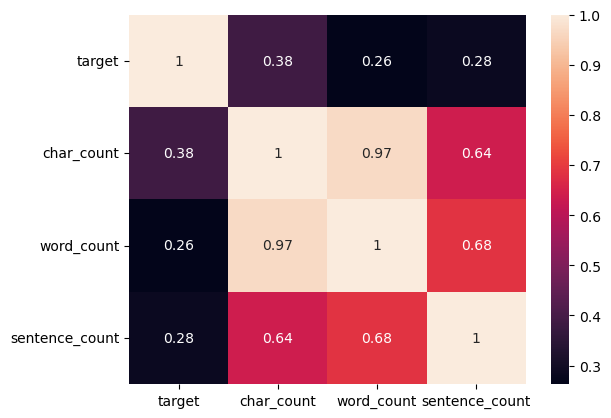

In [40]:
# Assuming 'df' is your DataFrame
# Drop non-numeric columns or exclude them from correlation calculation
df_numeric = df.select_dtypes(include=[float, int])

# Calculate correlation matrix for numeric columns only
correlation_matrix = df_numeric.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True)

## data preprocessing
.lowercase
.tokenization
. removing special characters
. removing stop words and punctuation
. stemming

In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

def transform_text(text):
    ps = PorterStemmer()

    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = list(y)
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = list(y)
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)


In [42]:
transform_text('Hi how are you my very hot baby. are you studying ?')

'hi hot babi studi'

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,char_count,word_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
!pip install wordcloud

In [46]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [47]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

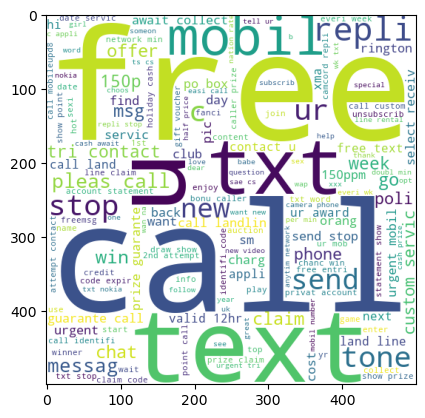

In [48]:
plt.imshow(spam_wc)

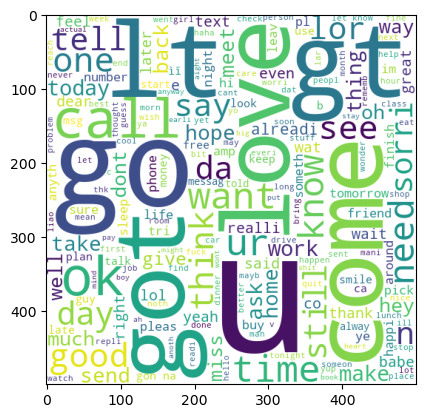

In [49]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [50]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
len(spam_corpus)

9939

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

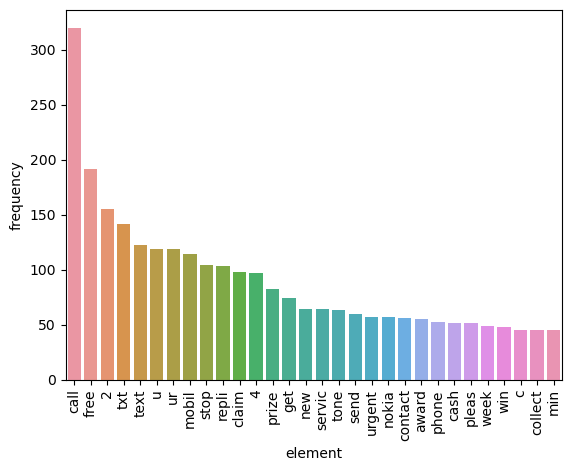

In [52]:
from collections import Counter

sns.barplot(x='element', y='frequency', data=pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['element', 'frequency']))
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

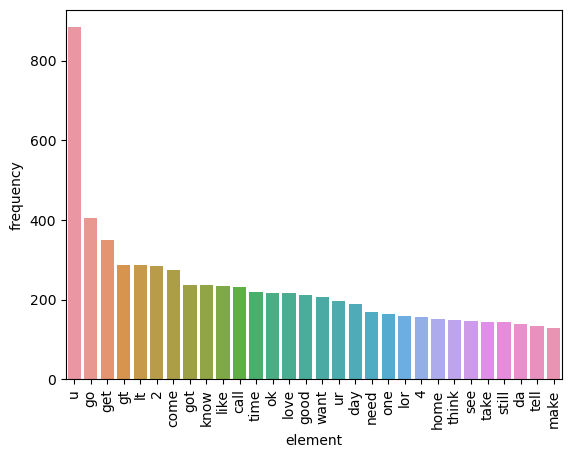

In [53]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

sns.barplot(x='element', y='frequency', data=pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['element', 'frequency']))
plt.xticks(rotation='vertical')

In [54]:
len(ham_corpus)

35394

MODEL BUILDING

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()

In [56]:
x = tv.fit_transform(df['transformed_text']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [58]:
from sklearn.model_selection import train_test_split


In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [61]:
mnb=MultinomialNB()

In [62]:
#checking multinomial nb
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)

print('accuracy = ',accuracy_score(y_test,y_pred))
print('confusion_matrix = ',confusion_matrix(y_test,y_pred))
print('precision = ',precision_score(y_test,y_pred))

accuracy =  0.9593810444874274
confusion_matrix =  [[896   0]
 [ 42  96]]
precision =  1.0


# BUILDING A TEXT SUMMARIZER NOW

In [63]:
# importing libraries 
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 

# Input text - to summarize 
def textSumm(text):
    
    # Tokenizing the text 
    stopWords = set(stopwords.words("english")) 
    words = word_tokenize(text) 

    # Creating a frequency table to keep the 
    # score of each word 

    freqTable = dict() 
    for word in words: 
        word = word.lower() 
        if word in stopWords: 
            continue
        if word in freqTable: 
            freqTable[word] += 1
        else: 
            freqTable[word] = 1

    # Creating a dictionary to keep the score 
    # of each sentence 
    sentences = sent_tokenize(text) 
    sentenceValue = dict() 

    for sentence in sentences: 
        for word, freq in freqTable.items(): 
            if word in sentence.lower(): 
                if sentence in sentenceValue: 
                    sentenceValue[sentence] += freq 
                else: 
                    sentenceValue[sentence] = freq 



    sumValues = 0
    for sentence in sentenceValue: 
        sumValues += sentenceValue[sentence] 

    # Average value of a sentence from the original text 

    average = int(sumValues / len(sentenceValue)) 

    # Storing sentences into our summary. 
    summary = '' 
    for sentence in sentences: 
        if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.2 * average)): 
            summary += " " + sentence 
    print(summary) 


# testing it on our message

In [67]:
msg='''There are many techniques available to generate extractive summarization to keep it simple, I will be using an unsupervised learning approach to find the sentences similarity and rank them. Summarization can be defined as a task of producing a concise and fluent summary while preserving key information and overall meaning. One benefit of this will be, you don’t need to train and build a model prior start using it for your project. It’s good to understand Cosine similarity to make the best use of the code you are going to see. Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Its measures cosine of the angle between vectors. The angle will be 0 if sentences are similar.'''

checking spam/ham for our message

In [68]:
#preprocess
transformed_msg = transform_text(msg)

#vectorize
vector_input = tv.transform([transformed_msg])

#predict
result = mnb.predict(vector_input)[0]


printing our result now

In [69]:
print("Spam or ham classification : ")
if result == 1:
    print("SPAM")
else:
    print("HAM")
    
print("____________________________________________________________________________________________")

print("Summarized message:")
textSumm(msg)

Spam or ham classification : 
HAM
____________________________________________________________________________________________
Summarized message:
 There are many techniques available to generate extractive summarization to keep it simple, I will be using an unsupervised learning approach to find the sentences similarity and rank them. Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them.
